# Boston

![Boston](Image/Boston.jpg)

"The Boston Housing Dataset" składa się z cen nieruchomości w różnych miejscach w Bostonie. Zestaw danych zawiera cenę mieszkań, jak również informacje takie jak przestępczość w okolicy mieszkania (CRIM), wiek osób, które są właścicielami domu (AGE), oraz wiele innych atrybutów, które są dostępne.

W pierwszym kroku zobaczmy jak nasze dane się prezentują, w jakiej strukturze są przedstawione itd.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston)

{'data': array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]]), 'target': array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.

## Poznawanie Danych

![MeetData](Image/meetdata.jpg)

Nasz zaimportowany zbiór danych jest słownikiem.
W pierwszym ktoku sprawdzimy, jakie klucze posiada nasz słownik.


In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


 - data: zawiera informacje dla różnych domów
 - target: ceny domu
 - feature_names: atrybuty
 - DESCR: opisuje zbiór danych

Zanim przejdzimy do dalszych analiz musimy poznać nasze dane.

#### Ilość danych

In [4]:
print(boston.data.shape)

(506, 13)


(506, 13) oznacza, że istnieje 506 wierszy danych oraz 13 kolumn (atrybutów). 

W kolejnym kroku sprawdzamy, czym jest każdy atrybut.

#### Czym są nasze dane?

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Aby lepiej operować na danych zamieniamy je na dataframe w pandas.

#### Lepsza reprezentacja danych

In [6]:
bos = pd.DataFrame(boston.data,columns = boston.feature_names)
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


Widzimy, że w danych brakuje wartości docelowej PRICE - którą chcemy przewidzieć. 

Tworzymy nową kolumnę wartości docelowych i dodajemy ją do ramki danych.

In [7]:
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## Wstępne przetwarzanie danych


Możemy sprawdzić statystyki, czy dane mają braki itd.

Nasz zbiór jest "czysty", dlatego w przypadku tych danych nie musimy wstępnie przetwarzać danych.

Ale zawsze należy to sprawdzić!

In [8]:
print(bos.isnull().sum())
print(bos.describe())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO          

# Eksploracyjna analizą danych

To czego wcześniej nie zrobiliśmy wpłyneło na nasze wyniki!
Analiza danych jest bardzo ważnym krokiem przed szkoleniem modelu. 

W tej sekcji użyjemy niektórych wizualizacji, aby zrozumieć zależności w danych.
Pomogą nam one zedecydować jakich atrybutów powinniśmy użyć do predykcji.
Możliwe, że nie wszystkich, ale pewnie też nie jednej (jak powyżej).

W tym celu tworzymy macierz korelacji, która mierzy liniowe zależności pomiędzy zmiennymi. 

Macierz korelacji może być utworzona za pomocą funkcji corr z biblioteki pandas. 

Użyjemy funkcji heatmap z biblioteki seaborn do wykreślenia macierzy korelacji.

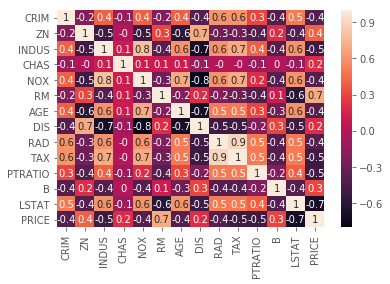

In [9]:
correlation_matrix = bos.corr().round(1)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Współczynnik korelacji jest z przedzialu od -1 do 1. 

- Jeśli wartość jest bliska 1, oznacza to, że istnieje silna dodatnia korelacja między dwiema zmiennymi. 
- Gdy jest zbliżony do -1, zmienne mają silną korelację ujemną.

#### Obserwacje:
- Aby dopasować model regresji liniowej, wybieramy te cechy, które mają wysoką korelację z naszą docelową zmienną PRICE. Patrząc na macierz korelacji, widzimy, że RM ma silną dodatnią korelację z Price (0,7), gdzie LSTAT ma wysoką ujemną korelację z PRICE (-0,74).
- Ważnym punktem w wyborze cech modelu regresji liniowej jest sprawdzenie wieloklinowości. Funkcje RAD, TAX mają korelację wynoszącą 0,91. Te pary funkcji są ze sobą silnie skorelowane. Nie powinniśmy wybierać obu tych cech razem w celu szkolenia modelu. To samo dotyczy cech DIS i AGE, które mają korelację -0,75.

# Regresja


![Ifyou](Image/Ifyou.jpg)

Zanim zajmiemy się wszystkimi atrybutami zbioru zróbmy prostą regresję, w której chcemy przewidzieć cenę mieszkania (PRICE) na podstawie ilości pokoi (RM).


## Linear Regression - Regresja Liniowa

Regresja liniowa jest jedną z najpopularniejszych metod tworzenia modelu i jest jedną z technik regresji, z której ludzie zaczynają się uczyć modelowania predykcyjnego. Ograniczenie regresji liniowej polega na tym, że wartość docelowa musi być ciągła, podczas gdy wartości predykcyjne mogą być zmienną ciągłą lub dyskretną.

Przy ustalaniu regresji liniowej, linia prosta będzie używana do wskazania linii najlepszego dopasowania do modelowania trendu. Aby uzyskać samą linię regresji, używamy techniki zwanej metodą Least Square. Wady stosowania regresji liniowej polegają na tym, że powinna istnieć liniowa zależność między wartością docelową a wartością predykcyjną. Regresja liniowa niestety jest również silnie uzależniony od wartości odstających.

![Reg1](Image/SimpleLinearRegression.PNG)
![Reg2](Image/SimpleLinearRegression2.PNG)
![Reg3](Image/SimpleLinearRegression3.PNG)

## Model nr 1
### Pierwsze (proste) podejście

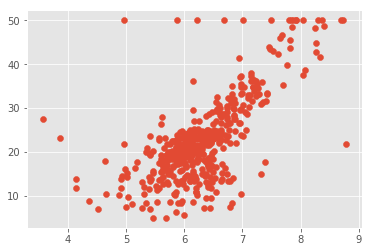

In [10]:
X = bos['RM'].values.reshape(-1,1)
Y = bos['PRICE'].values

plt.scatter(bos['RM'],bos['PRICE'])
plt.show()

#### Obserwacje:
- Ceny rosną, gdy wartość RM rośnie liniowo. Istnieje kilka wartości odstających, a dane wydają się być ograniczone do 50.



### Podział danych na zestawy treningowe i testowe

Aby sprawdzić, czy nasz model dobrze przewiduje cenę musimy zapewnić sobie zbiór testowy!m


W tym celu szkolimy model z 2/3 zestawu i testujemy z pozostałej 1/3. 

Robimy to, aby ocenić wydajność modelu na niewidocznych danych.

Do dzielenia danych używamy funkcji train_test_split udostępnianej przez bibliotekę naukową scikit. 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 1)
(167, 1)
(339,)
(167,)


Teraz dokonujemy prostej regresji za pomocą biblioteki sklearn.

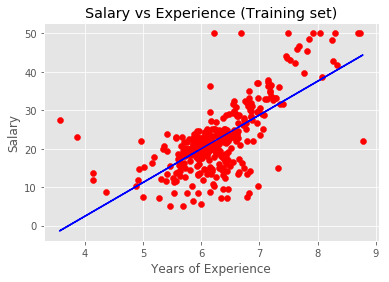

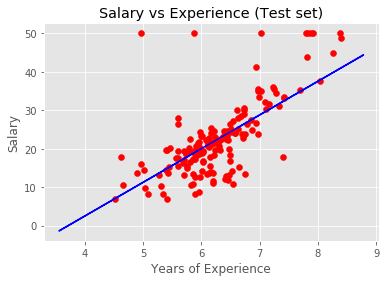

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
regressor = model.fit(X_train, Y_train)

# Visualising the Training set results
plt.scatter(X_train,Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


# znane vs. przewidziane
Y_pred = regressor.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [13]:
print(regressor.predict([[4]]))

[ 2.4631469]


In [14]:
#Sprawdzmy nasza dokladnosc
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
# y = b_0+b_1*x
print('Intercept: ', model.intercept_) #b_0
print('Coefficients: ', model.coef_) #b_1

# The mean squared error: 0 is perfect predict
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred)) 

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Intercept:  -32.5997423282
Coefficients:  [ 8.76572231]
Mean squared error: 46.09
Variance score: 0.51


## Model nr 2

In [15]:
XX = bos[['RM',"LSTAT"]].values
YY = bos['PRICE'].values

from sklearn.model_selection import train_test_split
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size = 0.33, random_state = 5)
model = LinearRegression()
regressor = model.fit(XX_train, YY_train)

YY_pred = regressor.predict(XX_test)

# The mean squared error: 0 is perfect predict
print("Mean squared error: %.2f" % mean_squared_error(YY_test, YY_pred)) 

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(YY_test, YY_pred))

Mean squared error: 34.72
Variance score: 0.63


MSD jest lepszy niż w poprzednim przypadku!
R2 też !

Dlatego zanim zbudujemy model analizujemy, analizujemy, ANALIZUJEMY!

Nasz model nie jest idealnym modelem liniowym. Ale na początek to dobra droga.

![Analiza](Image/analiza.png)